In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk


In [2]:
#convert all 
data_2014 = pd.read_csv("/Users/dunca/Documents/ML/ProjectData/2014_Financial_Data.csv")
data_2015 = pd.read_csv("/Users/dunca/Documents/ML/ProjectData/2015_Financial_Data.csv")
data_2016 = pd.read_csv("/Users/dunca/Documents/ML/ProjectData/2016_Financial_Data.csv")
data_2017 = pd.read_csv("/Users/dunca/Documents/ML/ProjectData/2017_Financial_Data.csv")
data_2018 = pd.read_csv("/Users/dunca/Documents/ML/ProjectData/2018_Financial_Data.csv")


In [3]:
#the companies are denoted by their stock ticker but the ticker column is unnamed
#this cell renames that to "Ticker" for all dataframes
data_2014.rename( columns={'Unnamed: 0':'Ticker'}, inplace=True )
data_2015.rename( columns={'Unnamed: 0':'Ticker'}, inplace=True )
data_2016.rename( columns={'Unnamed: 0':'Ticker'}, inplace=True )
data_2017.rename( columns={'Unnamed: 0':'Ticker'}, inplace=True )
data_2018.rename( columns={'Unnamed: 0':'Ticker'}, inplace=True )


In [4]:
#construct 5 different sets of ticker labels, 1 for eachh data frame
ticker_set_2014 = set(data_2014["Ticker"])
ticker_set_2015 = set(data_2015["Ticker"])
ticker_set_2016 = set(data_2016["Ticker"])
ticker_set_2017 = set(data_2017["Ticker"])
ticker_set_2018 = set(data_2018["Ticker"])
#find the intersection of the sets. This limits us to those companies for whom we have data from all five years
all_common_companies = list(set.intersection(ticker_set_2014, ticker_set_2015, ticker_set_2016, ticker_set_2017,
                                        ticker_set_2018))
#filter dataframes using the list of common companies we created above
data_2014 = data_2014[data_2014["Ticker"].isin(all_common_companies)]
data_2015 = data_2015[data_2015["Ticker"].isin(all_common_companies)]
data_2016 = data_2016[data_2016["Ticker"].isin(all_common_companies)]
data_2017 = data_2017[data_2017["Ticker"].isin(all_common_companies)]
data_2018 = data_2018[data_2018["Ticker"].isin(all_common_companies)]

In [5]:

#Alright, lets try to get out the data we want from the 2014 array and make a new Pandas data frame with it
new_2014 = data_2014[["Ticker",'EPS','EBIT Margin', 'Net Profit Margin','Net Cash/Marketcap','priceBookValueRatio','priceEarningsRatio', 'priceCashFlowRatio',
 'returnOnAssets','inventoryTurnover','cashFlowToDebtRatio','totalDebtToCapitalization','Earnings Yield','Debt to Assets', 'Current ratio','Graham Net-Net']]
labels_2014 = data_2014[['Class']]
new_2015 = data_2015[["Ticker",'EPS','EBIT Margin', 'Net Profit Margin','Net Cash/Marketcap','priceBookValueRatio','priceEarningsRatio', 'priceCashFlowRatio',
 'returnOnAssets','inventoryTurnover','cashFlowToDebtRatio','totalDebtToCapitalization','Earnings Yield','Debt to Assets', 'Current ratio','Graham Net-Net']]
labels_2015 = data_2015[['Class']]
new_2016 = data_2016[["Ticker",'EPS','EBIT Margin', 'Net Profit Margin','Net Cash/Marketcap','priceBookValueRatio','priceEarningsRatio', 'priceCashFlowRatio',
 'returnOnAssets','inventoryTurnover','cashFlowToDebtRatio','totalDebtToCapitalization','Earnings Yield','Debt to Assets', 'Current ratio','Graham Net-Net']]
labels_2016 = data_2016[['Class']]
new_2017 = data_2017[["Ticker",'EPS','EBIT Margin', 'Net Profit Margin','Net Cash/Marketcap','priceBookValueRatio','priceEarningsRatio', 'priceCashFlowRatio',
 'returnOnAssets','inventoryTurnover','cashFlowToDebtRatio','totalDebtToCapitalization','Earnings Yield','Debt to Assets', 'Current ratio','Graham Net-Net']]
labels_2017 = data_2017[['Class']]
new_2018 = data_2018[["Ticker",'EPS','EBIT Margin', 'Net Profit Margin','Net Cash/Marketcap','priceBookValueRatio','priceEarningsRatio', 'priceCashFlowRatio',
 'returnOnAssets','inventoryTurnover','cashFlowToDebtRatio','totalDebtToCapitalization','Earnings Yield','Debt to Assets', 'Current ratio','Graham Net-Net']]
labels_2018 = data_2017[['Class']]

In [6]:
#Defining the max number of NaN to data points
nanRatio = 0.1


#Now I am going to try to itter over the rows and figure out how many NaNs we have 
dataPoints2014 = new_2014.shape[0]
dataPoints2015 = new_2015.shape[0]
dataPoints2016 = new_2016.shape[0]
dataPoints2017 = new_2017.shape[0]
dataPoints2018 = new_2018.shape[0]
#Now I am going to try to itter over the rows and figure out how many NaNs we have 
dataPoints2014 = new_2014.shape[0]
dataPoints2015 = new_2015.shape[0]
dataPoints2016 = new_2016.shape[0]
dataPoints2017 = new_2017.shape[0]
dataPoints2018 = new_2018.shape[0]

null_2014 = new_2014.isnull().sum(axis=0)
null_2015 = new_2015.isnull().sum(axis=0)
null_2016 = new_2016.isnull().sum(axis=0)
null_2017 = new_2017.isnull().sum(axis=0)
null_2018 = new_2018.isnull().sum(axis=0)
#My Plan is to delete rows with NaN but If the majority rows have NaN then 
#it would be better to delete the column 
#making a ratio of NaN to data Points to mask with
null_2014 = null_2014 / dataPoints2014
null_2015 = null_2015 / dataPoints2015
null_2016 = null_2016 / dataPoints2016
null_2017 = null_2017 / dataPoints2017
null_2018 = null_2018 / dataPoints2018
#Things with high Null Ratio
#Current Ratio 0.25
#cashFlowToDebtRatio 0.41
#return on assets 0.25
#Price Cash Flor 0.25
#Price Booking 0.16

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

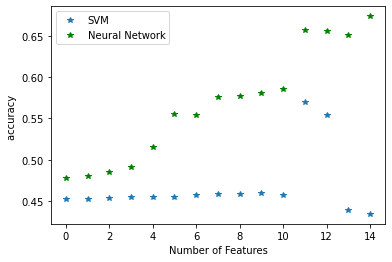

In [9]:
#Gonna get out the feature with the least Nan ratio
nullItter = null_2014.sort_values(axis = 0)
#Now need to get the column label
colLabel = nullItter.index
len = colLabel.size

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scalor = StandardScaler()
#Gonna start with the column with the least nans and for each itteration add
#another feature
totErrorSVM = np.zeros([len-1]) 
totErrorNN = np.zeros([len-1]) 
mySvm = svm.SVC()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,40), random_state=1)
mySplitter = KFold(n_splits=5)
#for now, I am going to combine all data sets to make a super data set
totalData = new_2014.append(new_2015,sort=False)
totalData = totalData.append(new_2016,sort=False)
totalData = totalData.append(new_2017,sort=False)
totalData = totalData.append(new_2017,sort=False)
totalLabels = labels_2014.append(labels_2015,sort=False)
totalLabels = totalLabels.append(labels_2016,sort=False)
totalLabels = totalLabels.append(labels_2017,sort=False)
totalLabels = totalLabels.append(labels_2018,sort=False)
for i in range(len-1):
    #Getting out how many labels we want 
    myFeat = colLabel[1:i+2]
    myDataSet = totalData[myFeat]
    #Now need to remove the rows with NaN 
    myMask = myDataSet.isnull().sum(axis = 1)
    myMask = myMask == 0
    myDataSet = myDataSet[myMask]
    myLabels = totalLabels[myMask]
    foldErrorSVM = 0
    foldErrorNN = 0
    #Gonna split the data into K folds and train an svm model 
    for trainIdx,testIdx in mySplitter.split(myDataSet):
        #Note convert your pandas data frame into a numpy array 
        #
        trainData = myDataSet.iloc[trainIdx]
        trainData = trainData.to_numpy()
        
    #
        testData = myDataSet.iloc[testIdx]
        testData = testData.to_numpy()
        trainLabel = myLabels.iloc[trainIdx]
        trainLabel = trainLabel.to_numpy()[:,0]
        testLabel = myLabels.iloc[testIdx]
        testLabel = testLabel.to_numpy()[:,0]
        #Need to standardize data set 
        """
        trainPoints = trainData.shape[0]
        trainMean = np.sum(trainData,axis = 0) / trainPoints
        trainData = trainData - trainMean"""
    
        scalor.fit(trainData)
        trainData = scalor.transform(trainData)
        testData = scalor.transform(testData)
        #Fitting an SVM and Neural Network to the training data set 
        myModel = mySvm.fit(trainData,trainLabel)
        clf.fit(trainData,trainLabel)
        #Predicting the Test Data 
        myTestSVM = mySvm.predict(testData)
        myTestNN = clf.predict(testData)
        #Using Euclidean distance to get the fold error
        myErrorSVM = myTestSVM == testLabel
        myErrorNN = myTestNN == testLabel
        myErrorSVM = np.sum(myErrorSVM)
        myErrorNN = np.sum(myErrorNN)
        #note we need to divide by the number of data points each time because each loop 
        #the number of data points is getting smaller 
        foldErrorSVM = foldErrorSVM + (myErrorSVM/ trainData.shape[0])
        foldErrorNN = foldErrorNN + (myErrorNN/ trainData.shape[0])
    totErrorSVM[i]= foldErrorSVM
    totErrorNN[i] = foldErrorNN

#Lets plot how the error changes
plt.plot(range(len-1),totErrorSVM,'*')
plt.plot(range(len-1),totErrorNN,'g*')
plt.xlabel('Number of Features')
plt.ylabel('accuracy ')
plt.legend(['SVM', 'Neural Network'])
plt.show()
